In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing = california_housing.frame
california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
boston_raw = datasets.load_boston()
boston = pd.DataFrame(boston_raw.data, columns = boston_raw.feature_names)
boston["MEDV"] = boston_raw.target

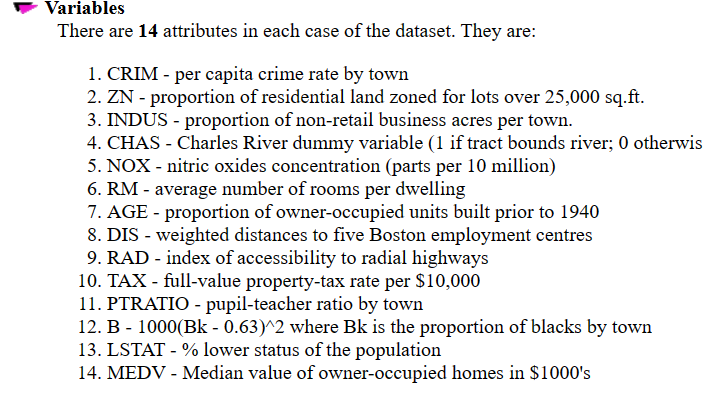

In [6]:
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.shape

(506, 14)

In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 2. Feature selection
Filter Method


In [9]:
pd.concat([boston.describe().T, boston.median()], axis=1).rename(columns={0:'median'})

,count,mean,std,min,25%,50%,75%,max,median
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,0.25651
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,0.00000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,9.69000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.00000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.53800
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,6.20850
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,77.50000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,3.20745
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,5.00000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,330.00000


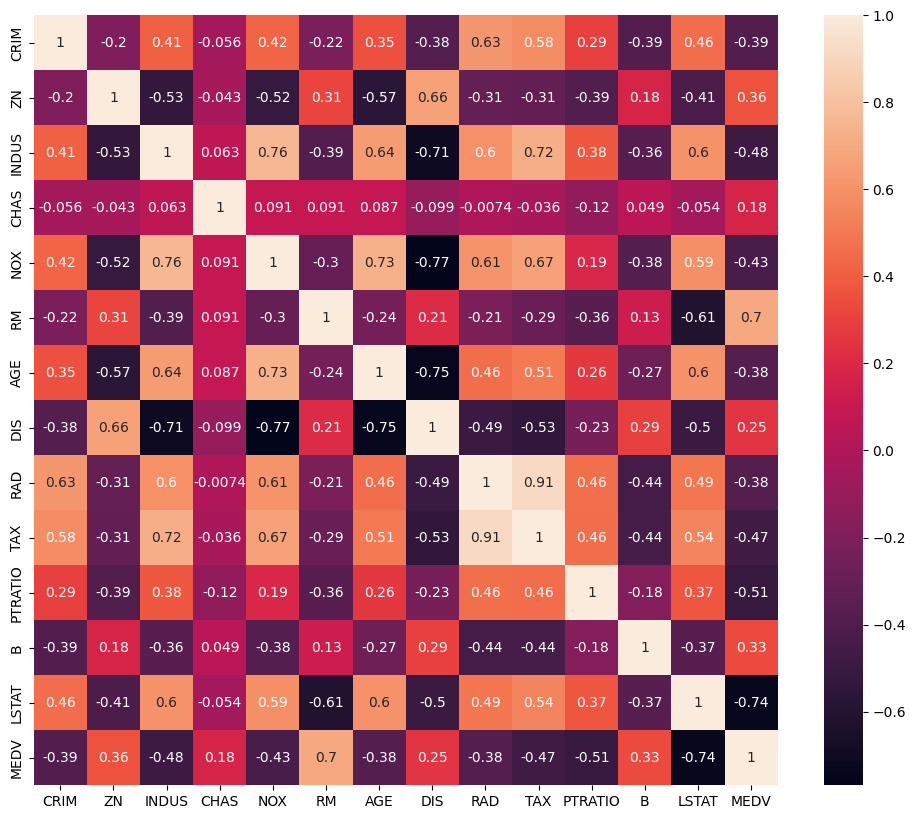

In [10]:
# Lets see how features correlate with target and each other
correlation = boston.corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True)
plt.show()

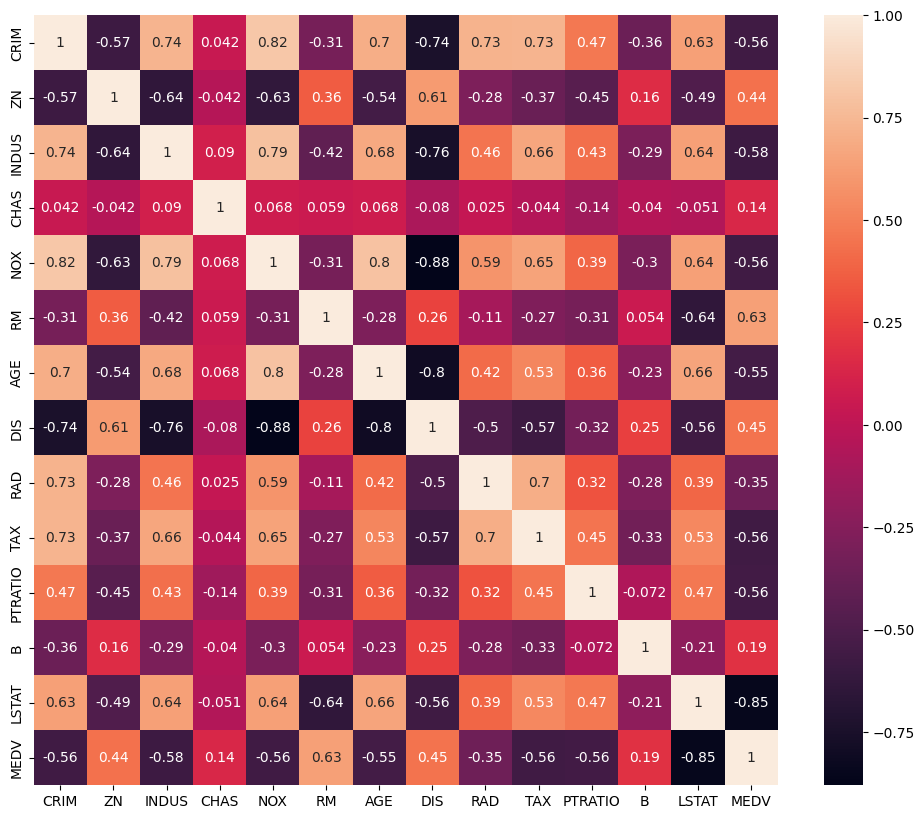

In [11]:
# Lets see how features correlate with target and each other
correlation = boston.corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [12]:
correlation_to_target = correlation['MEDV']
correlation_to_target

CRIM      -0.558891
ZN         0.438179
INDUS     -0.578255
CHAS       0.140612
NOX       -0.562609
RM         0.633576
AGE       -0.547562
DIS        0.445857
RAD       -0.346776
TAX       -0.562411
PTRATIO   -0.555905
B          0.185664
LSTAT     -0.852914
MEDV       1.000000
Name: MEDV, dtype: float64

In [13]:
target_relevant_features = correlation_to_target[ (correlation_to_target > 0.5) | (correlation_to_target < -0.5)  ]
target_relevant_features

CRIM      -0.558891
INDUS     -0.578255
NOX       -0.562609
RM         0.633576
AGE       -0.547562
TAX       -0.562411
PTRATIO   -0.555905
LSTAT     -0.852914
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
boston.shape

(506, 14)

In [15]:
boston.drop([i for i in boston.columns.to_list() if i not in target_relevant_features.keys().to_list()], axis=1, inplace=True)

In [16]:
boston

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,273.0,21.0,6.48,22.0


In [17]:
boston.corr()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,0.582764,0.289946,0.455621,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,0.720760,0.383248,0.603800,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,0.506456,0.261515,0.602339,-0.376955
TAX,0.582764,0.720760,0.668023,-0.292048,0.506456,1.000000,0.460853,0.543993,-0.468536
PTRATIO,0.289946,0.383248,0.188933,-0.355501,0.261515,0.460853,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.603800,0.590879,-0.613808,0.602339,0.543993,0.374044,1.000000,-0.737663
MEDV,-0.388305,-0.483725,-0.427321,0.695360,-0.376955,-0.468536,-0.507787,-0.737663,1.000000


In [18]:
boston.drop(["NOX", "TAX"], axis=1, inplace=True)

In [19]:
boston.sample()

,CRIM,INDUS,RM,AGE,PTRATIO,LSTAT,MEDV
69,0.12816,6.07,5.885,33.0,18.9,8.79,20.9


In [20]:
Y = boston['MEDV'].values

In [21]:
X = boston['CRIM INDUS RM AGE PTRATIO LSTAT'.split(" ")].values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True)

In [23]:
x_train.shape

(404, 6)

In [24]:
x_test.shape

(102, 6)

### Feature normalization


*  **Normalization** - scaling data into a range of [0, 1]. It's more useful and common for regression tasks.
MinMaxScaler in sklearn
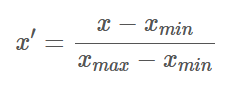
*   **Standardization** is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.
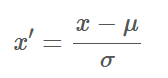
StandardScaler in sklearn

In [25]:
# should be done after train test split! so that info from test does not leak into train

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.fit_transform(x_test)

In [28]:
x_train[0]

array([ 0.04297,  5.32   ,  6.565  , 22.9    , 16.6    ,  9.51   ])

In [29]:
x_train_transformed[0]

array([4.98451062e-04, 1.69629630e-01, 5.75589193e-01, 2.05973223e-01,
       4.25531915e-01, 2.20709220e-01])

## Outliers !
The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.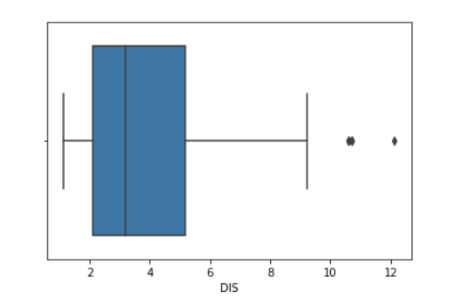

In [30]:
# Both normalization and standardization are sensitive to outliers

## Fit KNN Regressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
model = KNeighborsRegressor(n_neighbors=3)

In [38]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [39]:
print("Test:", " Accuracy =", model.score(x_test, y_test) *100)

Test:  Accuracy = 61.45453408518799


In [40]:
model = KNeighborsRegressor(n_neighbors=3)

In [41]:
model.fit(x_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
print("Test:", " Accuracy =", model.score(x_test_transformed, y_test) *100)

Test:  Accuracy = 62.70585549911287


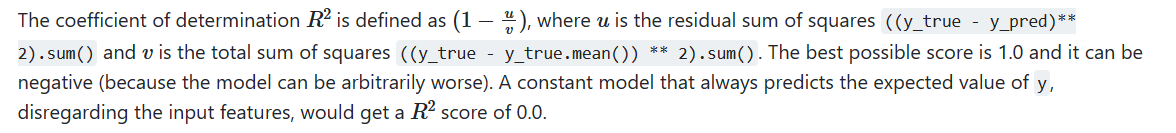
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score

# **Homework** 1

Perform a kind of an ablation study:

0) Load California house prices dataset.
Take a look at the data.
[California housing dataset page](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

```
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing = california_housing.frame
california_housing.head()
```

1) Train KNN Regressor. You may use with grid search to select the hyperparameters. Train the classifier **with and without** feature selection step (on all available features). Is there any change in quality on test data? In prediction speed? Compare the two models` quality. 

2) Train Linear regression (Ridge, Lasso) **with and without** feature normalization/scaling step. How does that affect the model`s quality on test data? Compare the two models quality.

3) Train Linear regression **with and without** feature selection step. How does that affect the model`s quality on test data? If you  try to filter even more features, how would that affect the model performance? How will coefficients change?

4)(**optional**) Implement a brute force KNN Algorithm (without using classes from sklearn or any other solutions). Test it on Boston or California, Iris datasets. 
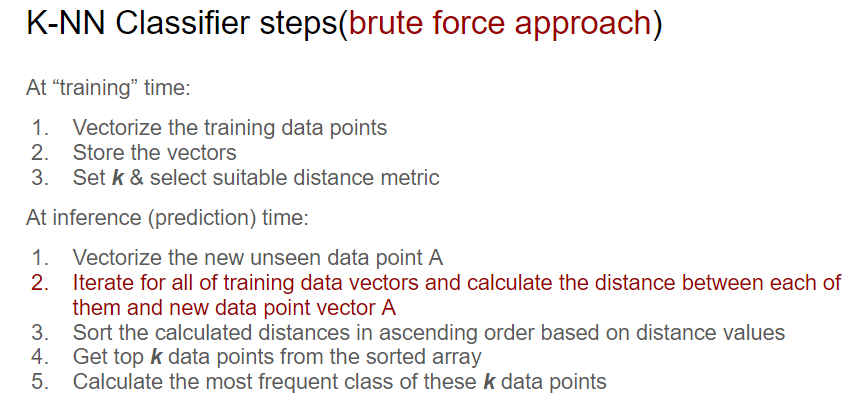
